In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
VOCAB_SIZE = 2500
TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

In [105]:
#Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
#Target
Y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')
#Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

# Calculating joint probability

## Dot product

In [106]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a.dot(b)#1x4 + 2x5 + 3x6

32

In [107]:
c = np.array([[0,6], [3,0], [5,1]])
a.dot(c)# [(1x0 + 2x3 + 3x5), (1x6 + 2x0 + 3x1)] 

array([21,  9])

In [108]:
X_test.dot(prob_token_spam).shape

(1724,)

## Set the prior
$$P(Spam\, | \,X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [109]:
PROB_SPAM = 0.3116

### We will do calculations using log values because the values are small and it will thus spread out, making our plots look good

In [110]:
np.log(prob_token_spam)

array([ -4.42132243,  -5.26541002,  -5.00041935, ...,  -9.11129322,
       -11.0084132 ,  -9.21665373])

## Joint probability in log format

In [111]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

In [112]:
joint_log_spam[:5]

array([22.38087912,  1.97014738, 17.81657779, 16.75967797, 19.55623258])

In [113]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) +(np.log(1 - PROB_SPAM)) 

In [114]:
joint_log_ham[:5]

array([-58.96121422, -10.85938821, -34.75859073, -58.55693497,
       -53.20399326])

# Making Predictions
## Checking for higher joint probability
$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$

In [115]:
prediction = joint_log_spam > joint_log_ham

In [116]:
prediction

array([ True,  True,  True, ..., False, False, False])

In [117]:
prediction*1#Typecasting Boolean to integer

array([1, 1, 1, ..., 0, 0, 0])

### Simplifying the formula

In [118]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) +np.log(1 - PROB_SPAM) 

# Metrics and evaluation
#### Accuracy

In [119]:
correct_docs = (Y_test == prediction).sum()
print('Docs classified correctly = ', correct_docs)
num_docs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly = ', num_docs_wrong)

Docs classified correctly =  1685
Docs classified incorrectly =  39


In [120]:
# Accuracy
correct_docs/len(X_test)

0.9773781902552204

In [121]:
fraction_wrong = num_docs_wrong/len(X_test)
fraction_wrong

0.02262180974477958

# Visualising our results

In [122]:
#Chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'
line_data = np.linspace(start = -14000, stop = 1, num =  1000)

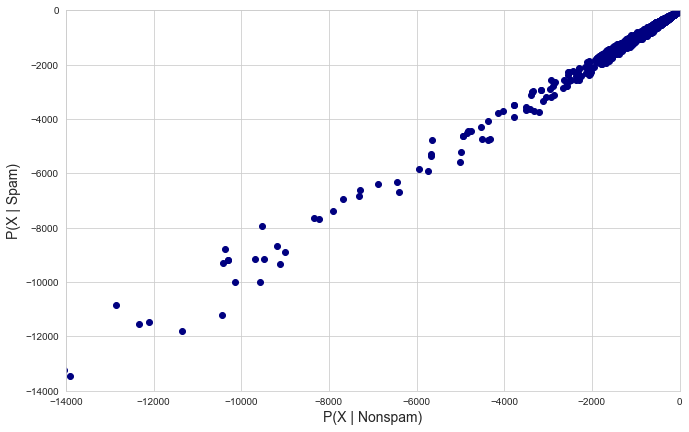

In [123]:
plt.figure(figsize = (11,7))
plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize = 14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham , joint_log_spam, color = 'navy')
plt.show()

## The Decision boundary

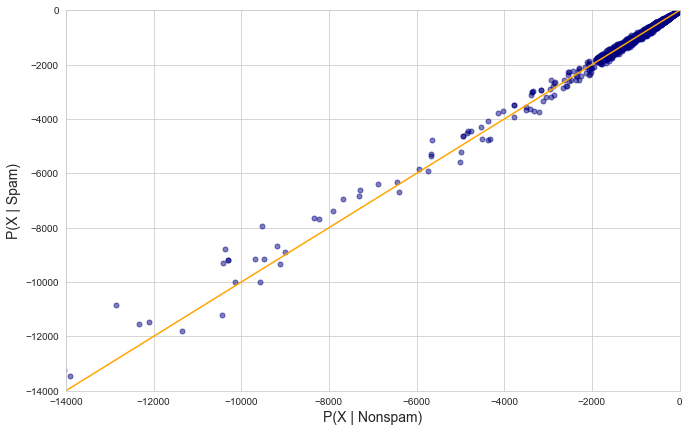

In [124]:
plt.figure(figsize = (11,7))
plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize = 14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham , joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(line_data, line_data, color = 'orange')
plt.show()

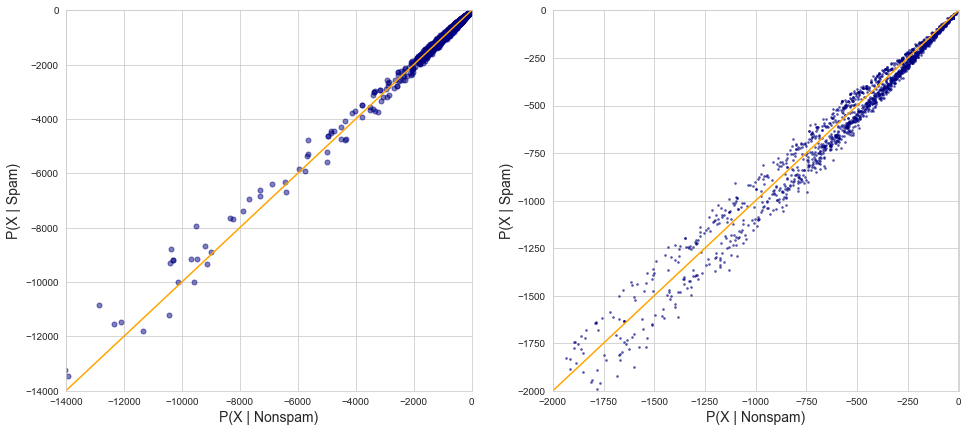

In [125]:
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)#Chart 1
plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize = 14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham , joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(line_data, line_data, color = 'orange')
plt.subplot(1,2,2)#Chart 2
plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize = 14)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.scatter(joint_log_ham , joint_log_spam, color = 'navy', alpha = 0.5, s = 3)
plt.plot(line_data, line_data, color = 'orange')
plt.show()

In [126]:
# Chart styling
sns.set_style('whitegrid')
labels = 'Actual Category'

In [127]:
summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: Y_test})

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


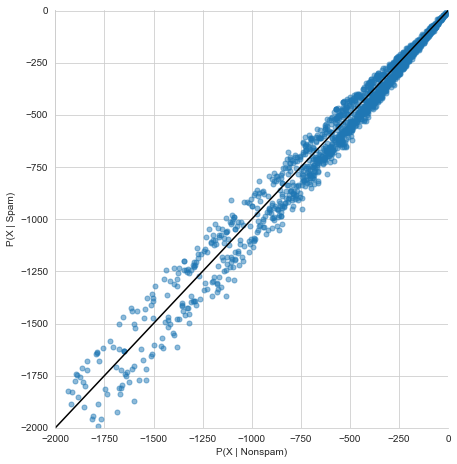

In [129]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, size = 6.5, fit_reg = False, scatter_kws={'alpha': 0.5, 's' : 25})
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(line_data, line_data, color = 'k')

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

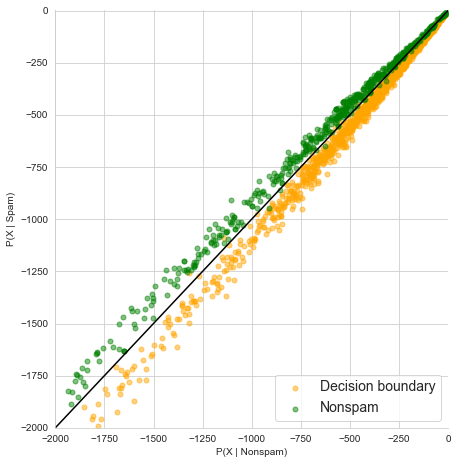

In [130]:
colors = ['orange','green']
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, size = 6.5, fit_reg = False,legend=False, scatter_kws={'alpha': 0.5, 's' : 25}, hue=labels, palette=colors)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.legend(('Decision boundary', 'Nonspam', 'Spam'), loc = 'lower right', fontsize = 14)
plt.plot(line_data, line_data, color = 'k')
sns.plt.show()

In [ ]:
 colors = ['orange','green']
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, size = 6.5, fit_reg = False,legend=False, scatter_kws={'alpha': 0.5, 's' : 25}, hue=labels, palette=colors)
plt.xlim([-500,1])
plt.ylim([-500,1])
plt.legend(('Decision boundary', 'Nonspam', 'Spam'), loc = 'lower right', fontsize = 14)
plt.plot(line_data, line_data, color = 'k')
sns.plt.show()

In [ ]:
np.unique(prediction, return_counts = True)

In [ ]:
true_pos = (Y_test == 1) & (prediction == 1)# We use single ampersand which is a bitwise operator to compare element by element
true_pos

In [ ]:
true_pos.sum()#Number of true positives in the set

In [ ]:
false_pos = (Y_test == 0) & (prediction == 1)# We use single ampersand which is a bitwise operator to compare element by element
false_pos

In [ ]:
false_pos.sum()

In [ ]:
false_neg = (Y_test == 1) & (prediction == 0)# We use single ampersand which is a bitwise operator to compare element by element
false_neg

In [ ]:
false_neg.sum()

In [ ]:
true_neg = (Y_test == 0) & (prediction == 0)# We use single ampersand which is a bitwise operator to compare element by element
true_neg

In [ ]:
true_neg.sum()

# Recall score

In [ ]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
recall_score

# Precision

In [ ]:
precision_score = true_pos.sum()/(true_pos.sum() + false_pos.sum())
precision_score

# F Score or F1 Score

In [ ]:
f_score = 2*(precision_score*recall_score)/(recall_score+precision_score)
f_score